<a href="https://colab.research.google.com/github/ncfausti/ML-foundations/blob/master/MLP_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


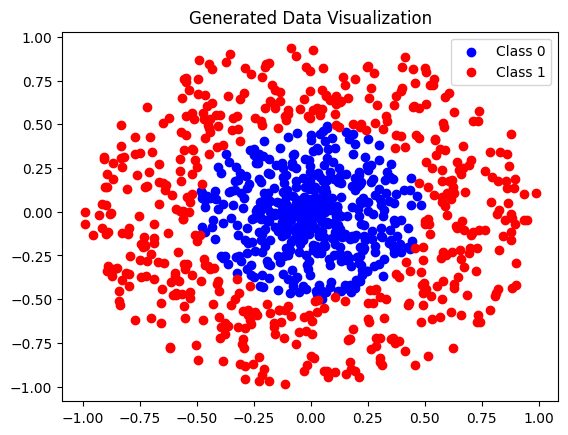

In [ ]:
def generate_ring_data(num_samples=1000, num_rings=6, tf=False):
    # Initialize arrays for points and labels
    points = np.zeros((num_samples, 2), dtype=np.float32)
    labels = np.zeros(num_samples, dtype=int)

    # Define the radii intervals for each ring
    max_radius = 1.0
    radii_intervals = np.linspace(0, max_radius, num_rings + 1)

    # Assign each point to a ring and label
    for i in range(num_samples):
        # Randomly choose a ring
        ring = np.random.randint(num_rings)
        # Random radius within the selected ring's interval
        r = np.random.uniform(radii_intervals[ring], radii_intervals[ring + 1])
        # Random angle
        angle = np.random.uniform(0, 2 * np.pi)
        # Polar to Cartesian conversion
        points[i] = [r * np.cos(angle), r * np.sin(angle)]
        # Assign label
        labels[i] = ring % 2
    if tf:
        return tf.convert_to_tensor(points, dtype=tf.float32), labels
    return points, labels

# Example usage
x_train, y_train = generate_ring_data(1000, 2)
x,y = x_train, y_train
# Visualization
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], c='blue', label='Class 0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], c='red', label='Class 1')
plt.legend()
plt.title('Generated Data Visualization')
plt.show()

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Weights and biases between input and hidden layer
        self.weights_input_hidden = np.random.randn(hidden_size, input_size)
        self.bias_hidden = np.random.randn(hidden_size, 1)

        # Weights and biases between hidden and output layer
        self.weights_hidden_output = np.random.randn(output_size, hidden_size)
        self.bias_output = np.random.randn(output_size, 1)

    def feedforward(self, x):
        # x is the input vector
        self.hidden = sigmoid(np.dot(self.weights_input_hidden, x) + self.bias_hidden)
        self.output = sigmoid(np.dot(self.weights_hidden_output, self.hidden) + self.bias_output)
        return self.output

    def backpropagation(self, x, y, learning_rate):
        # x is input, y is true output, learning_rate is the step size for weight update

        # Calculate derivatives
        # Error in output
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        # Error in hidden layer
        hidden_error = np.dot(self.weights_hidden_output.T, output_delta)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        # Update weights and biases
        self.weights_hidden_output += learning_rate * np.dot(output_delta, self.hidden.T)
        self.bias_output += learning_rate * output_delta

        self.weights_input_hidden += learning_rate * np.dot(hidden_delta, x.T)
        self.bias_hidden += learning_rate * hidden_delta


In [ ]:
# Example: Initialize network with 2 input neurons, 5 hidden neurons, and 1 output neuron
nn = NeuralNetwork(2, 5, 1)

# Training data (assuming x_train and y_train are your data)
Y = y_train.reshape(-1, 1)

# Training loop
epochs = 1000
learning_rate = 0.25

for epoch in range(epochs):
    total_loss = 0
    for x, y in zip(x_train, Y):
        x = x.reshape(-1, 1)  # Reshape x to be a column vector
        output = nn.feedforward(x)
        nn.backpropagation(x, y, learning_rate)
        total_loss += np.mean((y - output) ** 2)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(x_train)}")

Epoch 0, Loss: 0.2645967991992258
Epoch 100, Loss: 0.16191305046540239
Epoch 200, Loss: 0.1648429580908823
Epoch 300, Loss: 0.17576295455479543
Epoch 400, Loss: 0.19408855558733532
Epoch 500, Loss: 0.218006968965331
Epoch 600, Loss: 0.2508216344942384
Epoch 700, Loss: 0.19509637678046127
Epoch 800, Loss: 0.1638534398043732
Epoch 900, Loss: 0.15299531001232008


In [ ]:
x_test, y_test = generate_ring_data(1000, 2)
# y_test = y_test.reshape(-1, 1)  # Reshape if y_test is a 1D array
# outputs = [nn.feedforward((x.reshape(-1, 1))) for x in x_test]

outputs = []
for x in x_test:
    x = x.reshape(-1, 1)  # Reshape x to be a column vector
    predicted = nn.feedforward(x)
    outputs.append(predicted)


predicted_labels = np.round(outputs)  # Round to 0 or 1
accuracy = np.mean(predicted_labels.flatten() == y_test.flatten())
print(f"Test Accuracy: {accuracy}")


# mse = np.mean((np.array(outputs) - y_test) ** 2)
# print(f"Mean Squared Error: {mse}")


Test Accuracy: 0.785
